<a href="https://colab.research.google.com/github/riblidezso/DeepLearningCourse/blob/master/nb_01_baby_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Baby steps in deep learning



### Load useful python packages

In [1]:
# plotting and numerical basics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# machine learning baselines
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# keras deep learning framework (with tensorflow backend)
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# MNIST handwritten digits dataset

In [0]:
from keras.datasets import mnist
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Check some handwritten digits

Label: 9


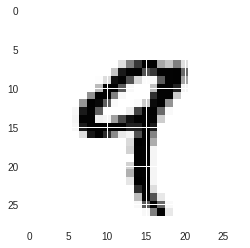

In [56]:
i = 4
imshow(x_train[i])
print('Label:', y_train[i] )

### Some more info about the dataset

In [57]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Normalize pixel values to 0-1 range

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

## Define functions for 'simple' machine learning baselines

In [0]:
def train_baseline(model, x_train, y_train, N_train=60000, **kwargs):
  """Train a baseline sklearn model."""
  x_train_flat = x_train.reshape(x_train.shape[0],-1)  # flatten
  clf = model(**kwargs)  # init machine learning model
  clf.fit(x_train_flat[:N_train],y_train[:N_train])  # train it
  return clf


def test_baseline(clf, x_test, y_test):
  """Evaluate a baseline sklearn model."""
  x_test_flat = x_test.reshape(x_test.shape[0],-1)  # flatten
  y_pred = clf.predict(x_test_flat)  # make predictions
  acc = np.equal(y_pred, y_test).mean()  # calculate accuracy
  print(clf.__class__.__name__, 'accuracy',acc)

### Test logistic regression

In [91]:
%%time
clf = train_baseline(LogisticRegression, x_train, y_train)
test_baseline(clf, x_test, y_test)

LogisticRegression accuracy 0.9201
CPU times: user 2min 21s, sys: 95.8 ms, total: 2min 21s
Wall time: 2min 21s


### Test Random Forest

In [95]:
%%time
clf = train_baseline(RandomForestClassifier, x_train, y_train,
                    n_jobs=-1, n_estimators = 300)
test_baseline(clf, x_test, y_test)

RandomForestClassifier accuracy 0.971
CPU times: user 4min 14s, sys: 448 ms, total: 4min 15s
Wall time: 2min 10s


# See neural networks

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

batch_size = 128
num_classes = 10
epochs = 12

In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 218us/step - loss: 0.2622 - acc: 0.9190 - val_loss: 0.0611 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0885 - acc: 0.9736 - val_loss: 0.0382 - val_acc: 0.9866
Epoch 3/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0643 - acc: 0.9810 - val_loss: 0.0336 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0538 - acc: 0.9844 - val_loss: 0.0306 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0468 - acc: 0.9862 - val_loss: 0.0320 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0422 - acc: 0.9871 - val_loss: 0.0321 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 9s 145us/step - loss: 0.0375 - acc: 0.9886 - val_loss: 0.0282 -